# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# tune model, get metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [2]:
#import the dataset
easyvisa=pd.read_csv('EasyVisa.csv')

In [3]:
#make a copy of the dataset
data=easyvisa.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
data.shape

(25480, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
#change the object data types to category type
for variable in data.columns:
    if data[variable].dtype =='object':
        data[variable]=pd.Categorical(data[variable])
#confirm the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.3 MB


In [7]:
#look at the data
data.head(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [8]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
#check for missing data
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [10]:
#check for duplicates
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations:
* There are 12 variables in this data set and 25,480 records
* There are 9 categorical variables (changed from object type)
* There are 2 int64 columns one of which, yr_of_estbl 
* Case id appears to be a unique field, so should perhaps be dropped.  Need to confirm.
* There are no missing values
* There are no duplicate records

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [11]:
#write a function to further examine the categorical columns
catColumns = data.describe(include=['category']).columns

for i in catColumns:
    print(i, "- unique values are:")
    print(data[i].value_counts(normalize = True))
    print('*' * 50)

case_id - unique values are:
EZYV9999     0.000039
EZYV17628    0.000039
EZYV1763     0.000039
EZYV17630    0.000039
EZYV17631    0.000039
               ...   
EZYV25281    0.000039
EZYV25282    0.000039
EZYV25283    0.000039
EZYV25284    0.000039
EZYV01       0.000039
Name: case_id, Length: 25480, dtype: float64
**************************************************
continent - unique values are:
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
**************************************************
education_of_employee - unique values are:
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
**************************************************
has_job_experience - unique values are:
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
********************

#### Observations
* Case id appears to be a unique identifier.  This variable will not offer anything to our predictive models so can be dropped
* I am little concerned about the apostrophes in the education_of_employee values so I am going to update those.
* I thought has_job_experience and requires_job_training might be duplicative but they do not appear to be. Roughly 58% of the applicants have job experience but 88% are listed as requiring job training. 
* Yr_of_estab has 199 values- I will bin those to make it more managable
* Case_status is our predicted variable and rougly 67% of the applicants in our file were certified.  

In [12]:
#drop case id
data.drop(['case_id'],axis=1,inplace=True)

#Remove the apostrophes and spaces in the education_of_employee variable
data.education_of_employee = data.education_of_employee.apply(lambda x: "Bachelors" if x == "Bachelor's" else x)

data.education_of_employee = data.education_of_employee.apply(lambda x: "Masters" if x == "Master's" else x)

data.education_of_employee = data.education_of_employee.apply(lambda x: "High_School" if x == "High School" else x)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.5 KB


In [14]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High_School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Masters,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelors,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelors,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Masters,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [15]:
data['education_of_employee'].value_counts()

Bachelors      10234
Masters         9634
High_School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [16]:
#update the values in the continent variable to eliminate spaces - for dummy variable purposes
data.continent = data.continent.apply(lambda x: "North_America" if x == "North America" else x)
data.continent = data.continent.apply(lambda x: "South_America" if x == "South America" else x)
data['continent'].value_counts(normalize=True)

Asia             0.661735
Europe           0.146468
North_America    0.129199
South_America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64

In [17]:
#Take a look at the numeric variables
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [18]:
#write a function to graph the numeric variables
def boxHistPlot (data, feature, figsize =(12,7), kde=False, bins = None):
    f2, (ax_box2, ax_hist2)= plt.subplots(nrows=2,sharex=False,gridspec_kw={"height_ratios": (0.25,0.75)},figsize=figsize)
    sns.boxplot(data=data, x=feature,ax = ax_box2, showmeans = True, color="orange")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins = bins, palette ='blues'
    )    if bins  else sns.histplot(data=data,x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color='orange', linestyle='--')
    ax_hist2.axvline(data[feature].median(), color ='purple', linestyle='-.')

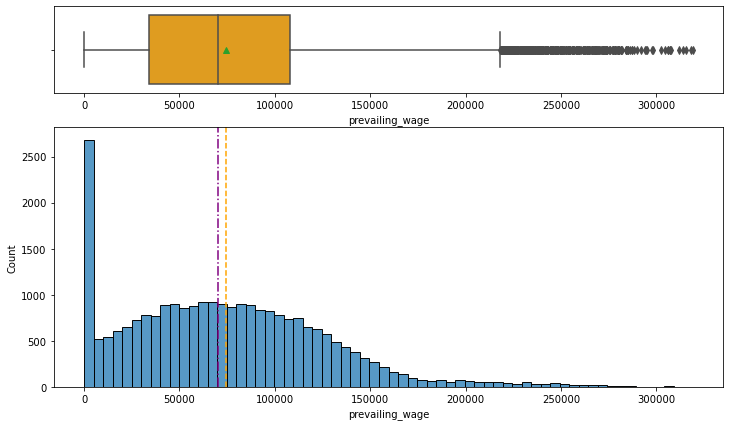

In [19]:
#plot prevailing wage
boxHistPlot (data, 'prevailing_wage')

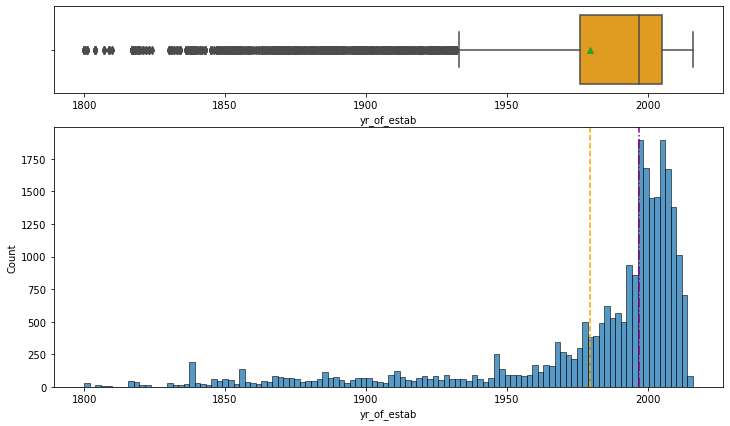

In [20]:
#plot yr_of_estab
boxHistPlot (data, 'yr_of_estab')

#### Observations on numeric variables
* prevailing wage is tied to unit of wage.  If I want this variable to be meaningful I may need to modify it to reflect the unit of wage.  I am not sure that is necessary but I need to look at the two variables more closely.
* no of employees looks odd too.  I need to take a closer look at these values.  The minimum is negative 26 which is very odd and the standard deviation is huge.  This maybe a candiate for binning.
* Yr_of_estab is heavily left skewed.  I don't think this category will have any impact on the final predictive model but I will leave it alone for now.

You can't have negative employees.  I will change these to make them all positive numbers.

In [21]:
data.no_of_employees=data.no_of_employees.apply(lambda x: x if(x>=0) else -x)

In [22]:
#confirm changes
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.5 KB


In [24]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High_School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Masters,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelors,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelors,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Masters,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<AxesSubplot:xlabel='unit_of_wage', ylabel='prevailing_wage'>

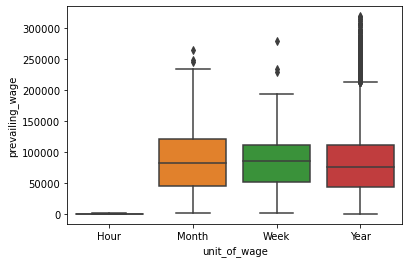

In [25]:
sns.boxplot(data=data, y='prevailing_wage', x='unit_of_wage')

#### Observations 
* For prevailing_wage this graph makes me think that the wages noted are already annualized in most cases.  There are definately some outliers but that may be important so I will leave them alone.
* Updated the no_of_employees count and it looks better now.

Now I will look at the categorical variables

In [26]:
# write a function to visualize the categorical variables
def barPlot (data, feature, perc = True, n = None):
    total = len(data[feature])
    count = data[feature].nunique()
    
    plt.xticks(rotation=45, fontsize= 10)
    ax = sns.countplot(data = data, x=feature)
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format( 100*  p.get_height()/total)
        else:
            lable = p.get_height()
    
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
    
        ax.annotate(label,(x,y),ha='center',va='center',xytext =(0,5), textcoords = 'offset points')
    
    plt.show()


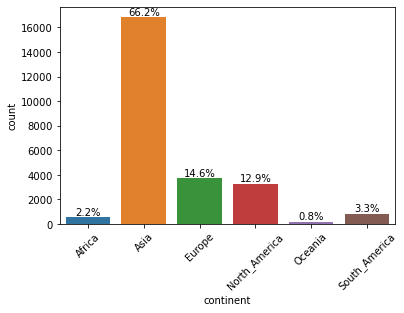

In [27]:
barPlot(data, 'continent')

66% of the candidates are from Asia.

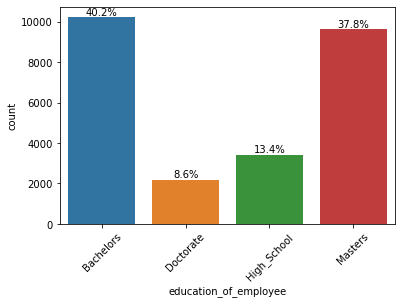

In [28]:
barPlot(data, 'education_of_employee')

46.4% of the candidates have a post graduate degree.

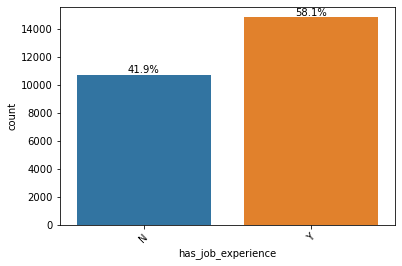

In [29]:
barPlot(data, 'has_job_experience')

58% have job experience

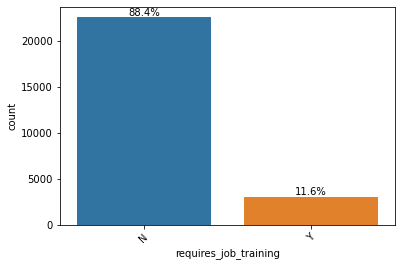

In [30]:
barPlot(data, 'requires_job_training')

Most candidate do not require job training.

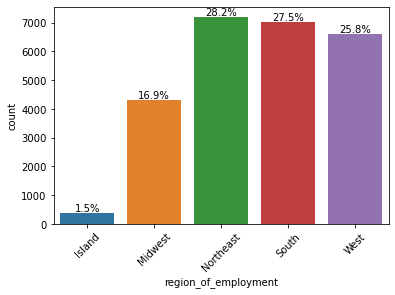

In [31]:
barPlot(data, 'region_of_employment')

Region of employment is spread pretty evenly across the US with a smaller percentage seeking employment in one of our island states / provinces and slighly smaller amount seeking employment in the midwest.

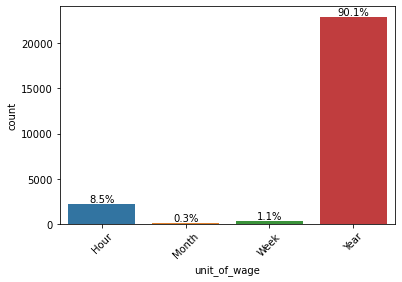

In [32]:
barPlot(data, 'unit_of_wage')

90% of the candidates listed an annual wage.  

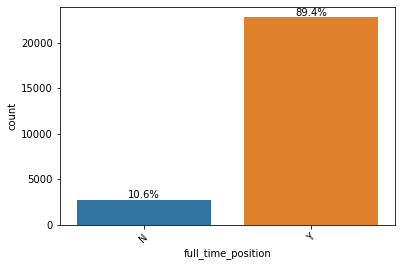

In [33]:
barPlot(data, 'full_time_position')

Most of the positions applied for are full time positions.

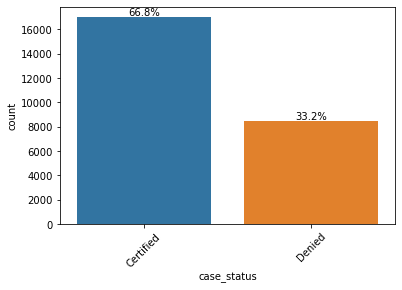

In [34]:
barPlot(data, 'case_status')

Case status is our predicted variable and we show that 66.8% of the candidates are certified.  

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [35]:
#write a function to create a stacked barplot

def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelors                   6367    3867  10234
High_School                 1164    2256   3420
Masters                     7575    2059   9634
Doctorate                   1912     280   2192
----------------------------------------------------------------------------------------------------


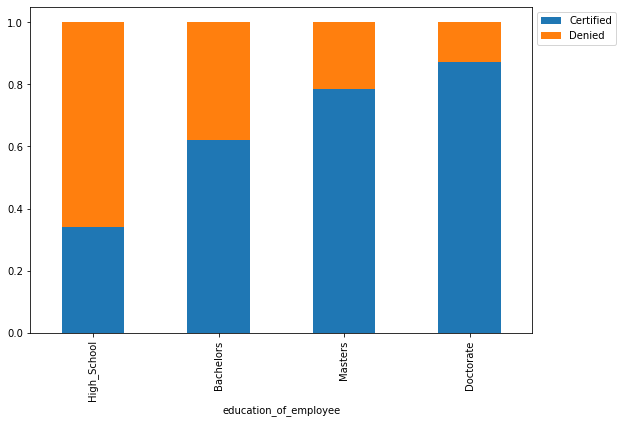

In [36]:
stacked_barplot(data,'education_of_employee', 'case_status')

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 
Yes, it appears that there is a correlation between education level case status being certified.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North_America       2037    1255   3292
Europe              2957     775   3732
South_America        493     359    852
Africa               397     154    551
Oceania              122      70    192
----------------------------------------------------------------------------------------------------


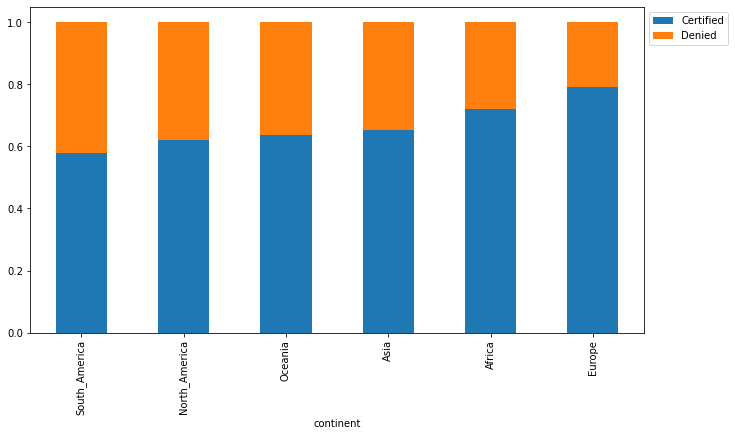

In [37]:
stacked_barplot(data,'continent', 'case_status')

How does the visa status vary across different continents? Candidates from Europe are more likely to be certified.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
----------------------------------------------------------------------------------------------------


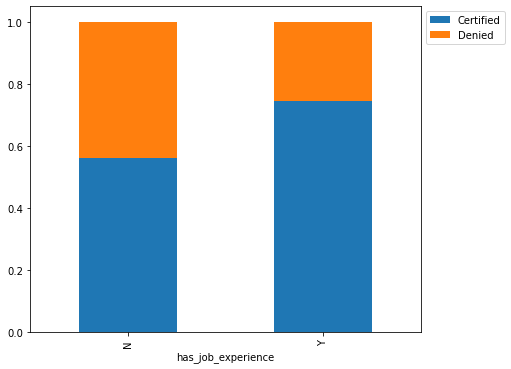

In [38]:
stacked_barplot(data,'has_job_experience', 'case_status')

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? Yes, a candidate with work experience is more likely to be certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
----------------------------------------------------------------------------------------------------


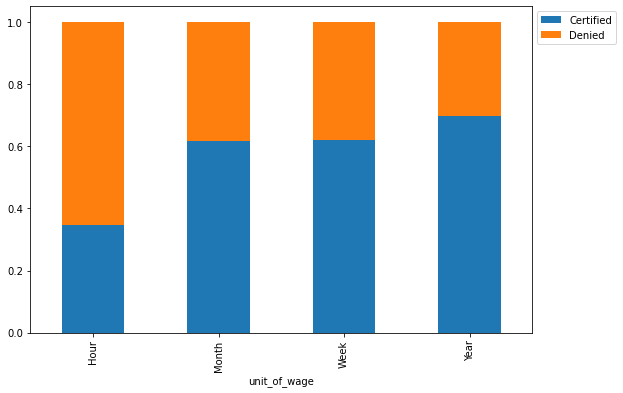

In [39]:
stacked_barplot(data,'unit_of_wage', 'case_status')

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? An candidate with an annual salary is the most likely to be certified for a visa.

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

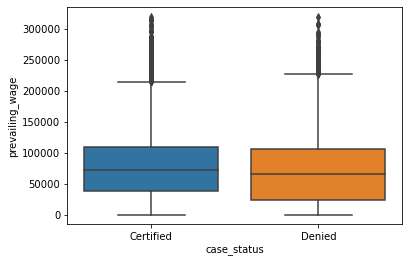

In [40]:
sns.boxplot(data=data, y='prevailing_wage', x='case_status')

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?  It doesn't look like the prevailing wage has much impact on the certification decision.

Now I will look at the correlations using bivariate analysis

<AxesSubplot:>

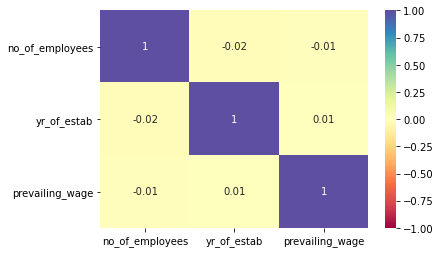

In [41]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt='.1g', cmap='Spectral')

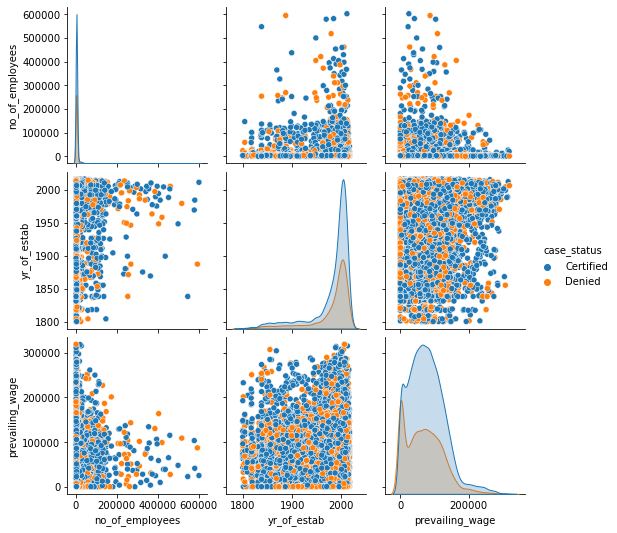

In [42]:
sns.pairplot(data,hue='case_status')
plt.show()

#### Observations

- I don't really see any correlations between the numeric variables or the predicted variables.

#### Preparing data for modeling 
*  Convert the predicted variable to 0 and 1
*  Split the data for train and test datasets
*  Create dummy variables for the categorial variables

In [43]:
#Convert the predicted variable to 0 for Denied and 1 for Certified
data['case_status']= data['case_status'].apply(lambda x: 1 if x=="Certified" else 0)

In [44]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High_School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Masters,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelors,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelors,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Masters,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [45]:
data['case_status'].value_counts(normalize=True)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

I still have 66.7% of the candidates who are certified (1)

In [46]:
#double check for duplicates - since we removed Case ID, make sure there are not duplicates
data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [47]:
x=data.drop('case_status', axis=1)
y= data['case_status']
x

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
0,Asia,High_School,N,N,14513,2007,West,592.2029,Hour,Y
1,Asia,Masters,Y,N,2412,2002,Northeast,83425.6500,Year,Y
2,Asia,Bachelors,N,Y,44444,2008,West,122996.8600,Year,Y
3,Asia,Bachelors,N,N,98,1897,West,83434.0300,Year,Y
4,Africa,Masters,Y,N,1082,2005,South,149907.3900,Year,Y
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelors,Y,Y,2601,2008,South,77092.5700,Year,Y
25476,Asia,High_School,Y,N,3274,2006,Northeast,279174.7900,Year,Y
25477,Asia,Masters,Y,N,1121,1910,South,146298.8500,Year,N
25478,Asia,Masters,Y,Y,1918,1887,West,86154.7700,Year,Y


In [48]:
y

0        0
1        1
2        0
3        0
4        1
        ..
25475    1
25476    1
25477    1
25478    1
25479    1
Name: case_status, Length: 25480, dtype: category
Categories (2, int64): [1, 0]

In [49]:
#Create dummy variables
x = pd.get_dummies(x, drop_first=True)

#add a constant
import statsmodels.api as sm
x=sm.add_constant(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              25480 non-null  float64
 1   no_of_employees                    25480 non-null  int64  
 2   yr_of_estab                        25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   continent_Asia                     25480 non-null  uint8  
 5   continent_Europe                   25480 non-null  uint8  
 6   continent_North_America            25480 non-null  uint8  
 7   continent_Oceania                  25480 non-null  uint8  
 8   continent_South_America            25480 non-null  uint8  
 9   education_of_employee_Doctorate    25480 non-null  uint8  
 10  education_of_employee_High_School  25480 non-null  uint8  
 11  education_of_employee_Masters      25480 non-null  uin

In [50]:
from sklearn.model_selection import train_test_split
#Split the data
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)
print("Train set shape =", x_train.shape)
print("Train set breakout between Certified and Denied =", y_train.value_counts(normalize = True))
print("*"*50)
print("Test set shape", x_test.shape)
print("Test set breakout between Certified and Denied =", y_test.value_counts(normalize = True))

Train set shape = (17836, 22)
Train set breakout between Certified and Denied = 1    0.667919
0    0.332081
Name: case_status, dtype: float64
**************************************************
Test set shape (7644, 22)
Test set breakout between Certified and Denied = 1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model Evaluation

The model is needed to identify candidates who are likely to be certified for a visa.  
* If the model predicts that an applicant will be certified and he is not certified, it means wasted work for the review team.  
* If a candidate is predicted to be denied but he could in fact qualify to be certified, then the individual would unfairly be denied the opportunity.  
So, it is better to reduce false negatives and recall should be the metric used to determine the success of the model.

## Building bagging and boosting models

#### Start by building a function to generate the metric scores and a confusion matrix.

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf   

In [52]:
#write a function to create a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Train Results:
   Accuracy    Recall  Precision        F1
0  0.985142  0.985982   0.991726  0.988845
**************************************************
Test Results
   Accuracy    Recall  Precision        F1
0  0.695971  0.769246   0.774098  0.771664


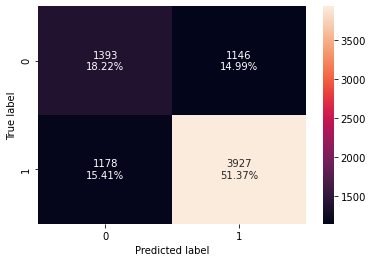

In [53]:
#Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(x_train,y_train)

#Calc metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,x_train,y_train)
print("Train Results:")
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,x_test,y_test)
print("*"*50)
print("Test Results")
print(bagging_classifier_model_test_perf)

#confusion matrix
confusion_matrix_sklearn(bagging_classifier,x_test,y_test)

The model is overfitting.  The training set results are excellent but the test set results drop off significantly.  We need a more generalize model.

In [89]:
# Tuning the parameters in the BaggingClassifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters 
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

Train Results:
   Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901
**************************************************
Test Results
   Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


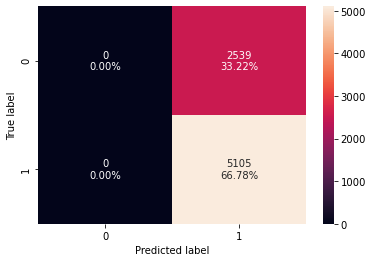

In [55]:
#Get the scores on the tuned model
bagging_estimator_tuned_train=model_performance_classification_sklearn(bagging_estimator_tuned,x_train,y_train)
print("Train Results:")
print(bagging_estimator_tuned_train)
bagging_estimator_tuned_test=model_performance_classification_sklearn(bagging_estimator_tuned,x_test,y_test)
print("*"*50)
print("Test Results")
print(bagging_estimator_tuned_test)

#confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,x_test,y_test)

#### Observations on the Bagging Model
The hypertuning was affective.  By reducing the number of estimators to 20, the max_features to .7 and the max samples to 1, the recall is at 100% for both train and test data.  The F1 score is decent and while precision and accuracy are at only 66% the model is generating generalized results between train and test data.

Now we will build a Decision Tree model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
**************************************************
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.661303  0.743585   0.747833  0.745703


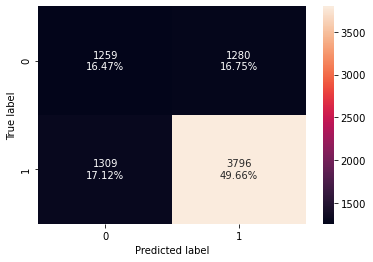

In [64]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train,y_train)

#Calculating different metrics
d_tree_model_train=model_performance_classification_sklearn(d_tree,x_train,y_train)
print("Training performance:\n",d_tree_model_train)
print("*"*50)
d_tree_model_test=model_performance_classification_sklearn(d_tree,x_test,y_test)
print("Testing performance:\n",d_tree_model_test)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,x_test,y_test)

The Decision Tree model is overfitting the data.  We will try tuning the model using the max_depth, min_samples_leaf, max_leaf_nodes and min_impurity_decrease parameters.

In [84]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# parameters 
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
**************************************************
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


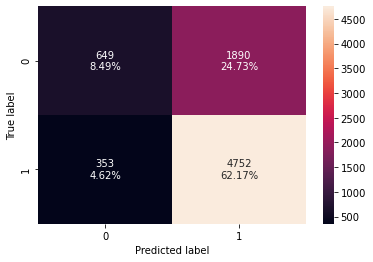

In [87]:
#Calc metrics
dtree_estimator_train_perf=model_performance_classification_sklearn(dtree_estimator,x_train,y_train)
print("Training performance:\n",dtree_estimator_train_perf)
print("*"*50)
dtree_estimator_test_perf=model_performance_classification_sklearn(dtree_estimator,x_test,y_test)
print("Testing performance:\n",dtree_estimator_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,x_test,y_test)

This tuned Decision Tree model is generalized well and giving excellent recall on both the train and test data sets.

Next we will try a Random Forest model.

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72135  0.833105   0.768939  0.799737


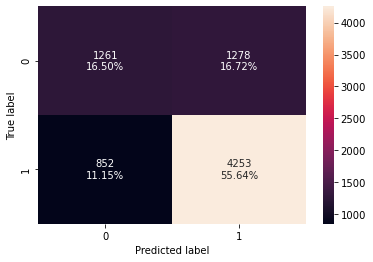

In [60]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,x_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,x_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,x_test,y_test)

The Random Forest model overfit on the training data.  We will try tuning this model.

In [65]:
rf_tuned = RandomForestClassifier(class_weight={0:0.33,1:0.67},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)), 
                'max_features': ['sqrt','log2',None],
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=5,
                       max_features='sqrt', oob_score=True, random_state=1)

Train Results
   Accuracy    Recall  Precision        F1
0  0.674759  0.997482   0.673105  0.803802
**************************************************
Test Results
   Accuracy    Recall  Precision        F1
0  0.676086  0.997649   0.673945  0.804454


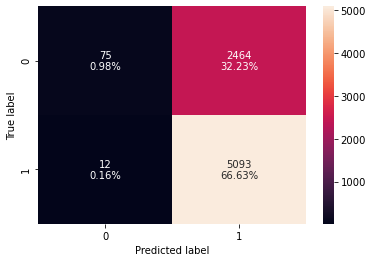

In [66]:
#Calc metrics
rf_tuned_model_train=model_performance_classification_sklearn(rf_tuned,x_train,y_train)
print("Train Results")
print(rf_tuned_model_train)
rf_tuned_model_test=model_performance_classification_sklearn(rf_tuned,x_test,y_test)
print("*"*50)
print("Test Results")
print(rf_tuned_model_test)

#Create confusion matrix
confusion_matrix_sklearn(rf_tuned,x_test,y_test)

The tuned Random Forest model is more generalized and is again providing excellent recall on both the training and test data sets.

Now we will try the AdaBoost model.

Train Results
   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
**************************************************
Test Results
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


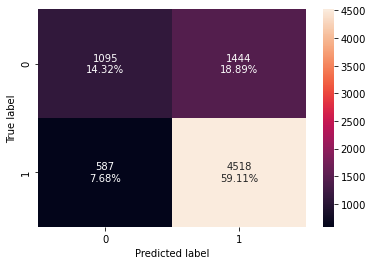

In [67]:
#Fit the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

#Calc metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print("Train Results")
print(ab_classifier_model_train_perf)
print("*"*50)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print("Test Results")
print(ab_classifier_model_test_perf)

#Create confusion matrix
confusion_matrix_sklearn(ab_classifier,x_test,y_test)

The AdaBoost model is preforming well.  The results are generalized between the training and testing data sets and the recall score is 88% for both train and test.  The accuracy, precision and F1 scores are all decent and generalized as well.

We will try tuning this model to see if it can be improved even more.

In [68]:
# Choose the classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Parameters 
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators":[10,20,30,40,50],
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

Train Results
   Accuracy   Recall  Precision        F1
0  0.691915  0.97146   0.691834  0.808142
**************************************************
Test Results
   Accuracy    Recall  Precision        F1
0  0.690607  0.971988   0.690702  0.807551


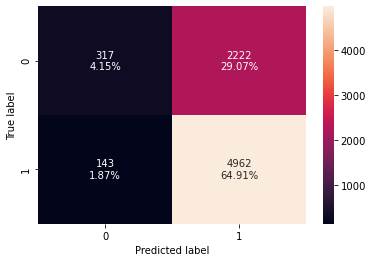

In [69]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,x_train,y_train)
print("Train Results")
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,x_test,y_test)
print("*"*50)
print("Test Results")
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

The tuned AdaBoost model is giving excellent recall results and the model is generalized between the train and test set.  

Next we will try the Gradient Boosting model

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
**************************************************
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


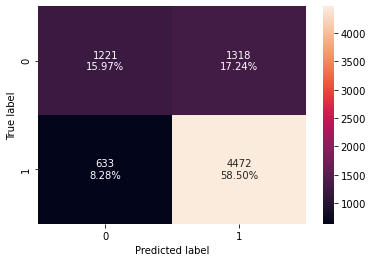

In [70]:
#Fitt the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

#Calculate metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,x_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,x_test,y_test)
print("*"*50)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Create confusion matrix
confusion_matrix_sklearn(gb_classifier,x_test,y_test)

The Gradient Boosting model is doing well too.  It is generalized between train and test data sets and the recall is at roughly 88%.  We will try tuning this model as well.

In [71]:
# Choose classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Parameters
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring 
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.734189  0.922773   0.742068  0.822614
**************************************************
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.916552   0.732582  0.814306


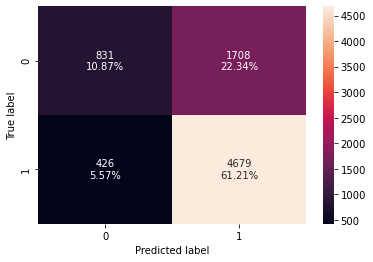

In [72]:
#Calculate metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,x_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,x_test,y_test)
print("*"*50)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

The the tuned GB model is performing well too.  The results are generalized between training and test data and the recall is excellent at roughly 92%.   The tuning improved the recall score and didn't negatively impact the accuracy, precision and F1 score too much.

Now I will try the XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


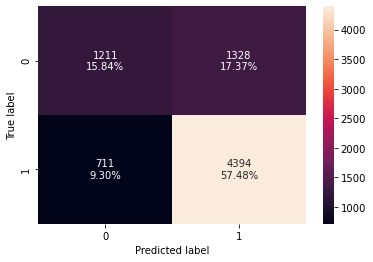

In [73]:
#Fit the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(x_train,y_train)

#Calc metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,x_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,x_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Create confusion matrix
confusion_matrix_sklearn(xgb_classifier,x_test,y_test)

This model is performing well too with some overfitting.  We will try tuning the model to see if we can address the overfitting.

In [78]:
# Choose the classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# parameters 
parameters = {
    "n_estimators": [10,30,50],
    "subsample":[0.7,0.9,1],
    "scale_pos_weight":[1,2,5],
    "learning_rate":[0.05, 0.1,0.2],
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.686365  0.999412   0.680615  0.809767
**************************************************
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.678833  0.995886   0.676244  0.805514


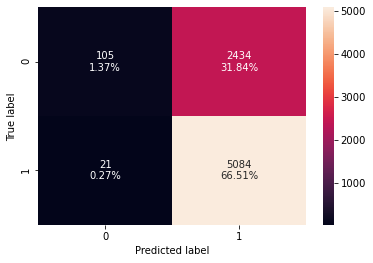

In [79]:
#Calc metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,x_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,x_test,y_test)
print("*"*50)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,x_test,y_test)

While recall is improved with the tuned XGB model and it appears to be generalized between train and test data, the accuracy and precision were negatively impacted.

## Model Performance Comparison and Conclusions

In [95]:
# boosting model tuned performance comparison

boosting_models_comp_df = pd.concat(
    [abc_tuned_model_train_perf,abc_tuned_model_test_perf,
     gbc_tuned_model_train_perf,gbc_tuned_model_test_perf,xgb_tuned_model_train_perf,xgb_tuned_model_test_perf],
    axis=0,
)
boosting_models_comp_df.index = [
    "Adaboost Classifier Train",
    "Adabosst Classifier Test",
    "Gradient Boost Classifier Train ",
    "Gradient Boost Classifier Test",
    "XGB Classifier Train",
    "XGB Classifier Test"
    ]
print("Tuned Boosting Model Performance Comparison:")
boosting_models_comp_df

Tuned Boosting Model Performance Comparison:


,Accuracy,Recall,Precision,F1
Adaboost Classifier Train,0.691915,0.971460,0.691834,0.808142
Adabosst Classifier Test,0.690607,0.971988,0.690702,0.807551
Gradient Boost Classifier Train,0.734189,0.922773,0.742068,0.822614
Gradient Boost Classifier Test,0.720827,0.916552,0.732582,0.814306
XGB Classifier Train,0.686365,0.999412,0.680615,0.809767
XGB Classifier Test,0.678833,0.995886,0.676244,0.805514


The tuned boosting models generalized well and the XGB Classifier model gave the best results with a .99 recall score.

In [88]:
# bagging classifier performance comparison

bagging_models_comp_df = pd.concat(
    [bagging_estimator_tuned_train,bagging_estimator_tuned_test,rf_tuned_model_train,rf_tuned_model_test,
     dtree_estimator_train_perf, dtree_estimator_test_perf],
    axis=0,
)
bagging_models_comp_df.index = [
    "Bagging Classifier Train",
    "Bagging Classifier Test",
    "Random Forest Classifier Train",
    "Random Forest Classifier Test",
    "Decision Tree Classifier Train",
    "Decision Tree Classifier Test",
    ]
print("Tuned Bagging Model Performance Comparison:")
bagging_models_comp_df

Tuned Bagging Model Performance Comparison:


,Accuracy,Recall,Precision,F1
Bagging Classifier Train,0.667919,1.000000,0.667919,0.800901
Bagging Classifier Test,0.667844,1.000000,0.667844,0.800847
Random Forest Classifier Train,0.674759,0.997482,0.673105,0.803802
Random Forest Classifier Test,0.676086,0.997649,0.673945,0.804454
Decision Tree Classifier Train,0.712548,0.931923,0.720067,0.812411
Decision Tree Classifier Test,0.706567,0.930852,0.715447,0.809058


The bagging classifer models are overfit the data but the tuned models all provided excellent recal scores. 

All of the models are giving decent results.  The Bagging Classifier and the XGB Classifier were both overfitting the data.  However, those two models with hyperparameter tuning gave the best recall results.  The rest of the models were generalized between training and test data.

In [98]:
# best models performance comparison

best_models_comp_df = pd.concat(
    [bagging_estimator_tuned_train,bagging_estimator_tuned_test,xgb_tuned_model_train_perf,xgb_tuned_model_test_perf],
    axis=0,
)
best_models_comp_df.index = [
    "Bagging Classifier Train",
    "Bagging Classifier Test",
    "XGB Classifier Train",
    "XGB Classifier Test"
    ]
print("Best Model Performance Comparison:")
best_models_comp_df

Best Model Performance Comparison:


,Accuracy,Recall,Precision,F1
Bagging Classifier Train,0.667919,1.000000,0.667919,0.800901
Bagging Classifier Test,0.667844,1.000000,0.667844,0.800847
XGB Classifier Train,0.686365,0.999412,0.680615,0.809767
XGB Classifier Test,0.678833,0.995886,0.676244,0.805514


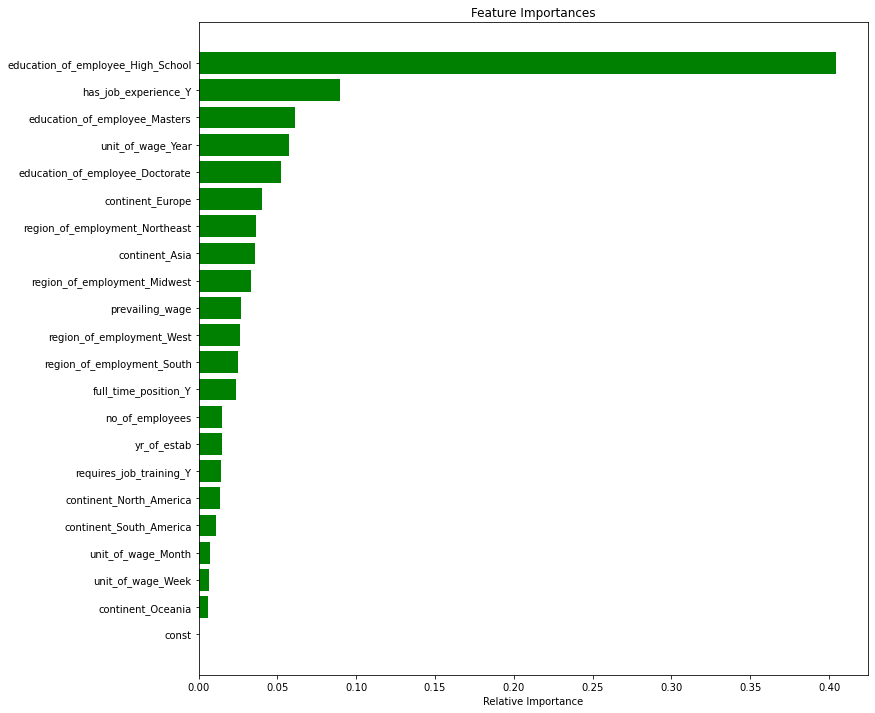

In [101]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the XGB tuned model the most important feature is the education level = high school of the candidate with job experience as a distant second. 

#### Insights
- Employers vary in size from as few as 11 employees up to over 600K employees
- Employers vary in company age with the oldest company being over 200 years old and the youngest company being established in 2016
- Employers are located across the US and spread pretty evenly across the Northeast, South and West with less located in the Midwest and a small percentage located in our island state, and  provinces  ( this is likely relative  to population counts)
- Almost 90% of the positions are full time positions
- Applicants are coming from all the populated continents in the world with candidates from Asia accounting for over 66% of the population of candidates
- Applicants are mostly well educated with over 86% holding a college degree and 78% holding a post graduate degree
- Most applicants have job experiences all though 42% list no job experience.
- Over 88% require job training.

## Actionable Insights and Recommendations
#### Additional Data to Capture 

- Language Fluency – I suspect this has some influence on the fact that more European based candidates are certified than candidates from any other continent.
- Job Industry -  There are insights to be gained from including the job industry in the candidate profile. For example, which industries are hiring foreign candidates with only a high school education.
- Marital Status – It is likely that candidates are not married but this information could lead to additional insights.
- Position Duration -  is the employer seeking to fill a permanent or temporary position.
- Remote Work Eligible – With more and more businesses accommodating remote work models, this metric could likely impact the OFLC work volume. Perhaps the question is; why isn’t this position remote work eligible?

All six of the models we built provided very good results.  Hyperparameter tuning is complicated and it is possible that there may still be parameters that would retain the recall score but could improve the accuracy and precision scores. Continued refinement along with including the additional data points mentioned above would further enhance the success of the model.

The objective of our analysis was to identify the candidates who were most likely to be denied a visa certification to help reduce the amount of work for the OFLC.  Given that falsely identifying an applicant as one to be denied a visa would result in lost opportunity for both the individual and the employer, we chose to tune our models with an emphasis on the recall metric to reduce false negatives.  However, in order to accomplish the goal of reducing work for the OFLC, the other metrics should not be ignored.  With this in mind we recommend the following: 
- Use the XGB model which provides an excellent recall score but of our best models provides better, accuracy, precision and f1 scores.
- Start collecting the additional data points noted above as we expect that would create a more robust model and successful applicant profile.
- Continue to tune the hyperparamters of the model to achieve the desired work level reductions required by the OFLC.  
